#### %pylab is a "magic function" that you can call within IPython. This is what it does:
* import numpy
* import matplotlib
* from matplotlib import pylab, mlab, pyplot
* np = numpy
* plt = pyplot
* from IPython.core.pylabtools import figsize, getfigs
* from pylab import *
* from numpy import *

#### inline lets you plot figures inline, instead of in a new window or shell.

In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Data
The dataset that I used is for Loan Prediction Practice Problem (from Analytics Vidhya) and can be downloaded from https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

In [12]:
# read dataset

df = pd.read_csv("../data/train.csv")
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

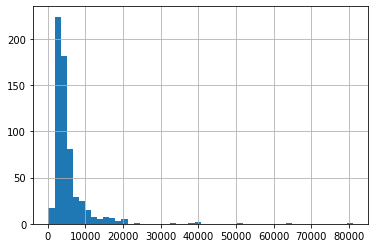

In [20]:
df['ApplicantIncome'].hist(bins=50) # number of value in range

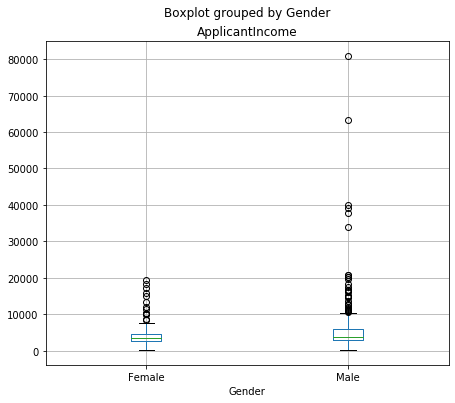

In [29]:
fig, ax = plt.subplots(figsize=(7,6))
df.boxplot(column='ApplicantIncome', by="Gender", ax = ax)

* We can see that the mean incomes of males and females are close but there are more males with very high income.

### The chances of getting a loan based on credit history

In [36]:
a = df['Credit_History'].value_counts(ascending=True)

# Probility of getting loan for each Credit History class
b = df.pivot_table(values='Loan_Status', index = ['Credit_History'],
              aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())

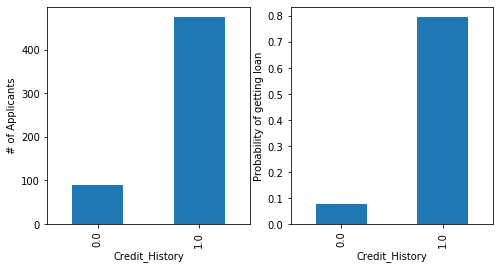

In [62]:
fig = plt.figure(figsize= (8,4))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('# of Applicants')
a.plot(kind='bar')

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
b_series = b.squeeze() # convert data frame to series 
b_series.plot(kind='bar')

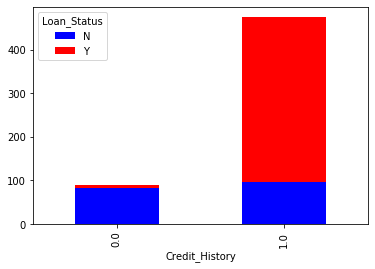

In [65]:
# combine in one plot

c = pd.crosstab(df['Credit_History'], df['Loan_Status'])
c.plot(kind= 'bar', stacked= True, color=['blue', 'red'])

## 4. Data Munging